<a href="https://colab.research.google.com/github/dudesparsh/Applied-ML/blob/master/IMDB_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Checking for GPU server
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18090113926737388368, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12310311402674985593
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13279754052123800509
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15956161332
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8111243265566341288
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
## Classifying IMDB reviews as positive or negative

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [0]:
# Preparing the data 

In [6]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [7]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [8]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [9]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()


In [0]:
data = load_data(path)

In [12]:
## Tokenization : Breaking raw sentences into words

data = TextDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [13]:
## Step 2 : Numericalization - converting tokens into integers,
## by creating a list of all the words used

data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [14]:
data.train_ds[0][0]

Text xxbos xxmaj there are numerous films relating to xxup xxunk , but xxmaj mother xxmaj night is quite distinctive among them : xxmaj in this film , we are introduced to xxmaj howard xxmaj campbell ( xxmaj nolte ) , an xxmaj american living in xxmaj berlin and married to a xxmaj german , xxmaj helga xxmaj xxunk ( xxmaj lee ) , who decides to accept the role of a spy : xxmaj more specifically , a xxup cia agent xxmaj major xxmaj wirtanen ( xxmaj goodman ) recruits xxmaj campbell who becomes a xxmaj nazi xxunk in order to enter the highest xxunk of the xxmaj hitler regime . xxmaj however , the deal is that the xxup us xxmaj government will never acknowledge xxmaj campbell 's role in the war for national security reasons , and so xxmaj campbell becomes a hated figure across the xxup us . xxmaj after the war , he tries to xxunk his identity , but the past comes back and haunts him . xxmaj his only " friend " is xxmaj wirtanen , but even he can not do much for the xxunk of events that fal

In [15]:
# But now this data is whole numbers

data.train_ds[0][0].data[:10]


array([   2,    5,   56,   39, 1149,  129, 2172,   15,    6,    0])

In [16]:
# Using data block API ( for more flexibility)

data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [0]:
## Language Model
## Uses a lot of GPU

bs = 48

In [18]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/README')]

In [19]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [20]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')


In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)


In [22]:
data_lm.show_batch()


idx,text
0,". xxmaj my biggest problem with the movie was that the story does not offer a character that i could root for , since the intended hero is an idiot . xxmaj director xxmaj chang has no sense of style , and he is unable to hide the glaring imperfections found in the narrative . i know this is not supposed to be high art , but i found the"
1,"an hour glass , "" "" xxmaj this guy dropped out of ball for a while to find something he lost -- maybe it was his mind , "" "" xxmaj somebody needs a nap , "" and "" ever see a sunset as beautiful as that play . "" xxmaj where the characters have such little significance to each other that we never know them by name . xxmaj"
2,"the only room that is n't flammable , you should seriously consider being burned alive instead . \n \n ( xxmaj if i sound bitter , it 's because i just spent over two hours watching this movie and , uh , i did n't enjoy it very much . ) xxbos i 've got a question for those who thought of this idea . xxmaj why ? xxmaj"
3,'s life including a first wife . xxmaj playing the second and only wife in this film is xxmaj susan xxmaj hayward who only comes into the movie when it 's half over . i wish we 'd have seen more of her . xxmaj xxunk xxmaj kittredge xxmaj london survived her husband by almost 40 years dying in 1955 . \n \n o'shea in fact met and married
4,"3 of the main hero characters were reincarnations brought back to finish the job . xxmaj sarah completes her task and moves on to the afterlife . xxmaj jack does this as well . xxmaj then why does xxmaj ethan get screwed ? xxmaj he 's left alone , without the girl , without a map / compass / helicopter to help him get back . xxmaj what 's he"


In [23]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)


In [24]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


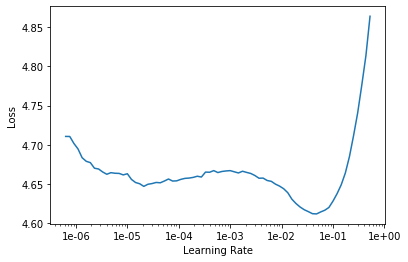

In [25]:
learn.recorder.plot(skip_end=15)

In [26]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.156218,4.022254,0.295337,26:08


In [0]:
learn.save('fit_head')

In [28]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos xxmaj considering its popularity , i found this movie a huge disappointment . xxmaj maybe i was expecting too much from this film . xxmaj after all , it is one of the most well known martial arts films of the 1970s , but i could never figure out why . xxmaj the story is uninteresting . xxmaj it is also a very talky movie with sporadic action sequences . xxmaj my biggest problem with the movie was that the story does not offer a character that i could root for , since the intended hero is an idiot . xxmaj director xxmaj chang has no sense of style , and he is unable to hide the glaring imperfections found in the narrative . i know this is not supposed to be high art , but i found the movie boring . xxmaj definitely not the best example of this much - beloved genre . xxmaj its cult status escapes me . i recommend you to skip it .,xxbos xxmaj what a complete piece of trash . xxmaj plot notwithstandin

In [0]:
# Now doing finetuning on this model

learn.unfreeze()

In [30]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.867375,3.841249,0.313252,26:25
1,3.855630,3.803251,0.319585,26:32


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.save('fine_tuned')


In [0]:
learn.load('fine_tuned');


In [0]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2


In [34]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because of the first one , but i am trying to find some interesting things like Elizabeth Taylor 's dream sequence with the version of the Prince of Darkness . While the movie is a little
I liked this movie because of how i loved it . Yes this movie is a bit slow but all in all it was kinda fun and i gave it a 4 / 10 . If you are a fan of the movies


In [0]:
learn.save_encoder('fine_tuned_enc')


In [0]:
## Classifier

In [0]:
path = untar_data(URLs.IMDB)

In [38]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')


In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs = bs)

In [40]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj titanic directed by xxmaj james xxmaj cameron presents a fictional love story on the historical setting of the xxmaj titanic . xxmaj the plot is simple , xxunk , or not for those who love plots that twist and turn and keep you in suspense . xxmaj the end of the movie can be figured out within minutes of the start of the film , but the love",pos
"xxbos xxmaj berlin - born in 1942 xxmaj margarethe von xxmaj trotta was an actress and now she is a very important director and writer . xxmaj she has been described , perhaps even unfairly caricatured , as a director whose commitment to bringing a woman 's sensibility to the screen outweighs her artistic strengths . "" xxmaj rosenstrasse , "" which has garnered mixed and even strange reviews (",pos
"xxbos i saw this movie during a xxmaj tolkien - themed xxmaj interim class during my sophomore year of college . i was seated unfortunately close to the screen and my professor chose me to serve as a whipping boy- everyone else was laughing , but they were n't within constant eyesight . \n \n xxmaj let 's get it out of the way : the xxmaj peter xxmaj",neg
"xxbos xxmaj after reading the previous comments , i 'm just glad that i was n't the only person left confused , especially by the last 20 minutes . xxmaj john xxmaj carradine is shown twice walking down into a grave and pulling the lid shut after him . i anxiously awaited some kind of explanation for this odd behavior ... naturally i assumed he had something to do with",neg


In [41]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj considering its popularity , i found this movie a huge disappointment . xxmaj maybe i was expecting too much from this film . xxmaj after all , it is one of the most well known martial arts films of the 1970s , but i could never figure out why . xxmaj the story is uninteresting . xxmaj it is also a very talky movie with sporadic action sequences . xxmaj my biggest problem with the movie was that the story does not offer a character that i could root for , since the intended hero is an idiot . xxmaj director xxmaj chang has no sense of style , and he is unable to hide the glaring imperfections found in the narrative . i know this is not supposed to be high art , but i found the movie boring . xxmaj definitely not the best example of this much - beloved genre . xxmaj its cult status escapes me . i recommend you to skip it .,xxbos xxmaj what a complete piece of trash . xxmaj plot notwithstanding , w

In [42]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


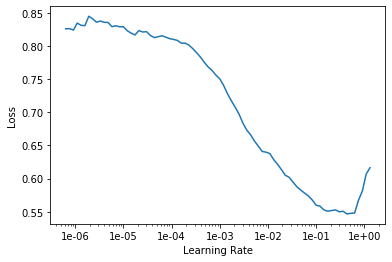

In [43]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.343606,0.278268,0.881560,05:57


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [52]:
learn.freeze_to(-2)
learn.fit_one_cycle(1,slice(1e-2/(2.6**4), 1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.288711,0.227722,0.910080,05:24


In [0]:
learn.save('third')

In [54]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj considering its popularity , i found this movie a huge disappointment . xxmaj maybe i was expecting too much from this film . xxmaj after all , it is one of the most well known martial arts films of the 1970s , but i could never figure out why . xxmaj the story is uninteresting . xxmaj it is also a very talky movie with sporadic action sequences . xxmaj my biggest problem with the movie was that the story does not offer a character that i could root for , since the intended hero is an idiot . xxmaj director xxmaj chang has no sense of style , and he is unable to hide the glaring imperfections found in the narrative . i know this is not supposed to be high art , but i found the movie boring . xxmaj definitely not the best example of this much - beloved genre . xxmaj its cult status escapes me . i recommend you to skip it .,xxbos xxmaj what a complete piece of trash . xxmaj plot notwithstanding , w

In [55]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.259665,0.205750,0.918760,06:18
1,0.239812,0.191508,0.924280,06:16


In [56]:
learn.predict("I really love that movie, it was awesome!")

(Category pos, tensor(1), tensor([1.2692e-05, 9.9999e-01]))

In [0]:
# Accuracy can be increased to more than this, but limited since training case time is too large